<a href="https://colab.research.google.com/github/Jetoga99/TweetSentimentClassification/blob/main/Proyecto_Final_Introducci%C3%B3n_a_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2><center><font color='black'><b> Proyecto Final<h2>
<center><font size=7 color='black'><b>NLP: Clasificación de tweets <center><h1>


<font size=6 color='black'><center><b>Data Analysis

In [1]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 36.3 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=8a3a27c3138667423cee48dc4a7ec532727f488e4030f105b65c1f07f357938c
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [2]:
#Importamos las Librerias 
#Analisis de datos y manejo de dataframe
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
#Para la limpieza de datos
import re, string
import emoji
import nltk

#Para la creacion del modelo
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#Para evaluar nuestro modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score, precision_recall_fscore_support


In [3]:
#Creación del directorio para descargar la base de datos
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#Descarga de la base de datos

!kaggle datasets download -d datatattle/covid-19-nlp-text-classification

100% 4.38M/4.38M [00:00<00:00, 22.0MB/s]
100% 4.38M/4.38M [00:00<00:00, 22.0MB/s]


In [5]:
#Extracción de la base de datos

!unzip covid-19-nlp-text-classification.zip

Archive:  covid-19-nlp-text-classification.zip
  inflating: Corona_NLP_test.csv     
  inflating: Corona_NLP_train.csv    


In [6]:
dtesto= pd.read_csv("Corona_NLP_test.csv",encoding="latin1")
dtraino=pd.read_csv("Corona_NLP_train.csv",encoding="latin1")

<font size=5 color='black'><b> Exploramos los tipos de datos que tenemos

In [7]:
dtesto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [8]:
dtraino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [9]:
dtraino.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [10]:
dtesto.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


Para nuestro análisis solo necesitamos de las columnas "OriginalTweet" y "Sentiment"

In [11]:
dtrain=dtraino[['OriginalTweet','Sentiment']]
dtest=dtesto[['OriginalTweet','Sentiment']]

Visualizaremos nuestros datos, gráficaremos la cantidad de tweets por sentimiento. Definimos una función para gráficar nuestros datos test y train.

In [12]:
def plot_stats(df, column, ax):
    count_classes = df[column].value_counts()
    ax = sns.barplot(x=count_classes.index, y=count_classes, ax=ax, palette="plasma")
    ax.set_title(column.upper(), fontsize=18)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

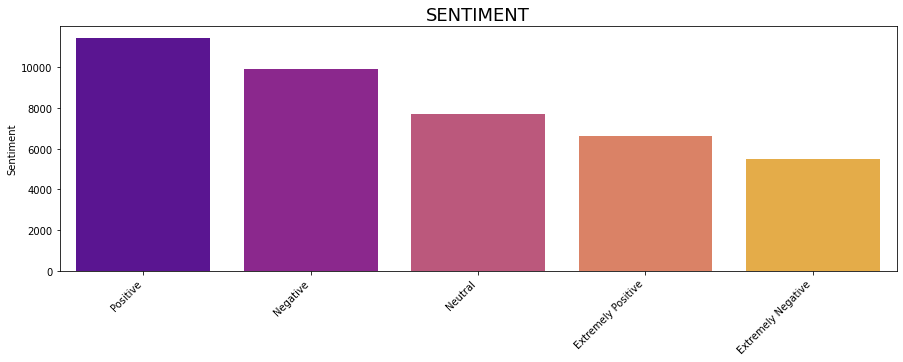

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
fig.autofmt_xdate()
plot_stats(dtrain, "Sentiment", axes)
plt.show()

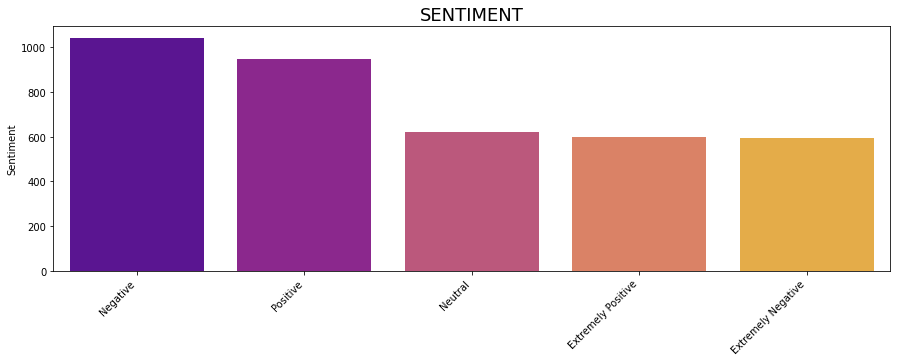

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
fig.autofmt_xdate()
plot_stats(dtest, "Sentiment", axes)
plt.show()

Por propositos de simplicidad solo tomaremos en cuenta los sentimientos "Extremely Negative", "Positive" y "Neutral"

In [71]:
sentiment_dic = {'Negative': 'Extremely Negative', 'Extremely Positive': 'Positive'}
dtrain['Sentiment'] = dtrain['Sentiment'].map(lambda x: sentiment_dic[x] if x in sentiment_dic.keys() else x)
dtest['Sentiment'] = dtest['Sentiment'].map(lambda x: sentiment_dic[x] if x in sentiment_dic.keys() else x)
dtrain.head()

,OriginalTweet,Sentiment,SentimentLabel,text_clean,text_len
1,advice Talk to your neighbours family to excha...,Positive,2,advice talk to your neighbours family to excha...,38
2,Coronavirus Australia: Woolworths to give elde...,Positive,2,coronavirus australia woolworths to give elder...,13
3,My food stock is not the only one which is emp...,Positive,2,my food stock is not the only one which is emp...,41
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0,me ready to go at supermarket during the covid...,39
5,As news of the regionÂs first confirmed COVID...,Positive,2,as news of the regions first confirmed covid19...,34


In [72]:
def number_of_characters(df, label, ax, color):
    """ COUNT NUMBER OF CHARACTERS """
    tweet_len = df[df['Sentiment']==label]['OriginalTweet'].str.len()
    ax.hist(tweet_len, color=color)
    ax.set_title(label.upper(), fontsize=18)

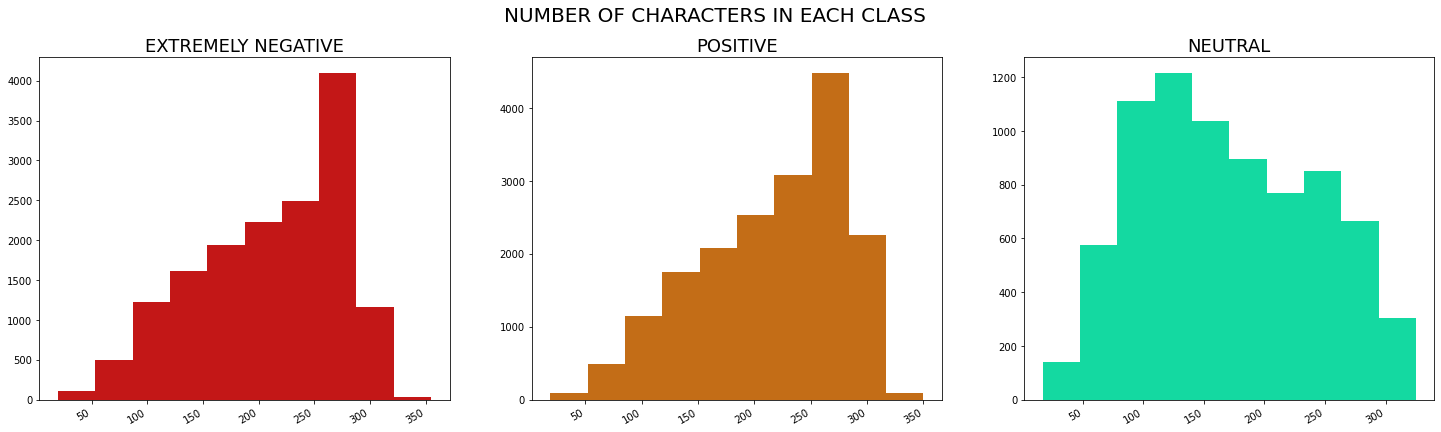

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,7))
fig.autofmt_xdate()
fig.suptitle('Número de Caracteres en Cada Clase', fontsize=20)
number_of_characters(dtrain, "Extremely Negative", axes[0], '#c31717')
number_of_characters(dtrain, "Positive", axes[1], '#c36d17')
number_of_characters(dtrain, "Neutral", axes[2], '#14d9a1')
plt.show()

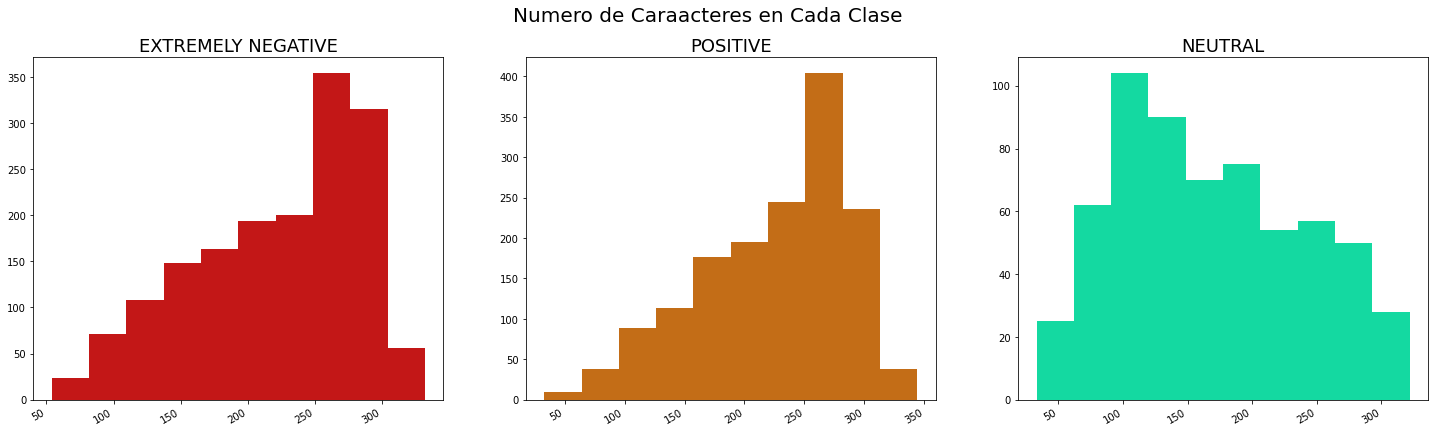

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,7))
fig.autofmt_xdate()
fig.suptitle('Numero de Caraacteres en Cada Clase', fontsize=20)
number_of_characters(dtest, "Extremely Negative", axes[0], '#c31717')
number_of_characters(dtest, "Positive", axes[1], '#c36d17')
number_of_characters(dtest, "Neutral", axes[2], '#14d9a1')
plt.show()

In [75]:
def avg_word_length(df, label, ax, color):
    """ Longitud Promedio """
    word = df[df['Sentiment']==label]['OriginalTweet'].str.split().apply(lambda x : [len(i) for i in x])
    sns.distplot(word.map(lambda x: np.mean(x)), ax=ax, color=color)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

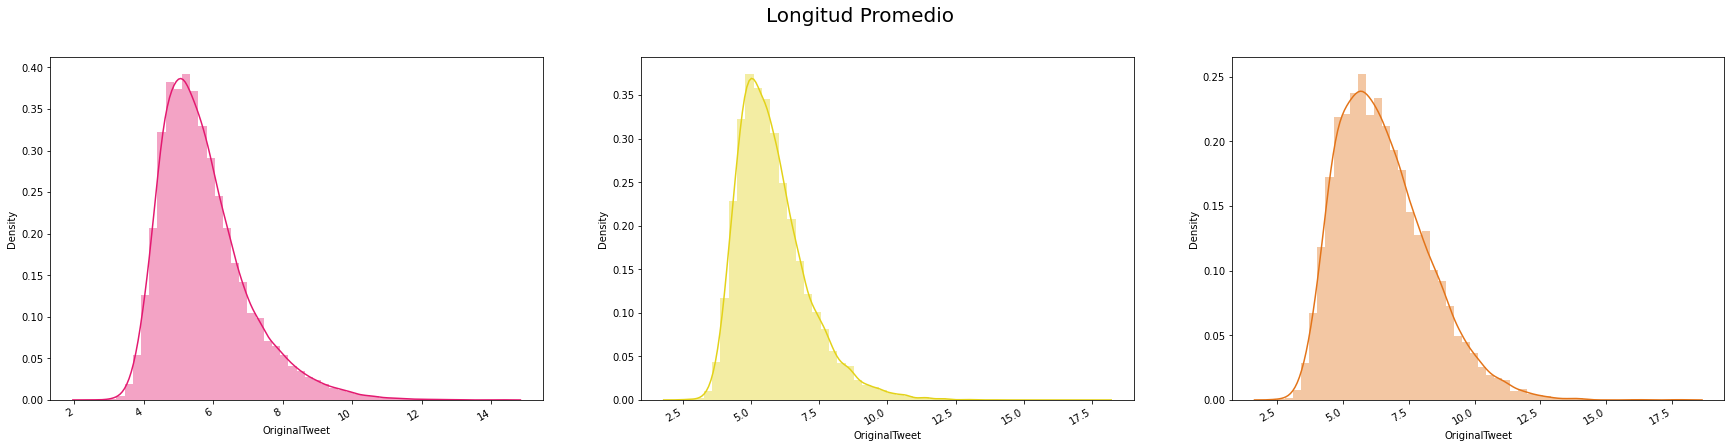

In [76]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,7))
fig.autofmt_xdate()
fig.suptitle('Longitud Promedio', fontsize=20)
avg_word_length(dtrain, "Extremely Negative", axes[0], '#e31970')
avg_word_length(dtrain, "Positive", axes[1], '#e3d219')
avg_word_length(dtrain, "Neutral", axes[2], '#e37419')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

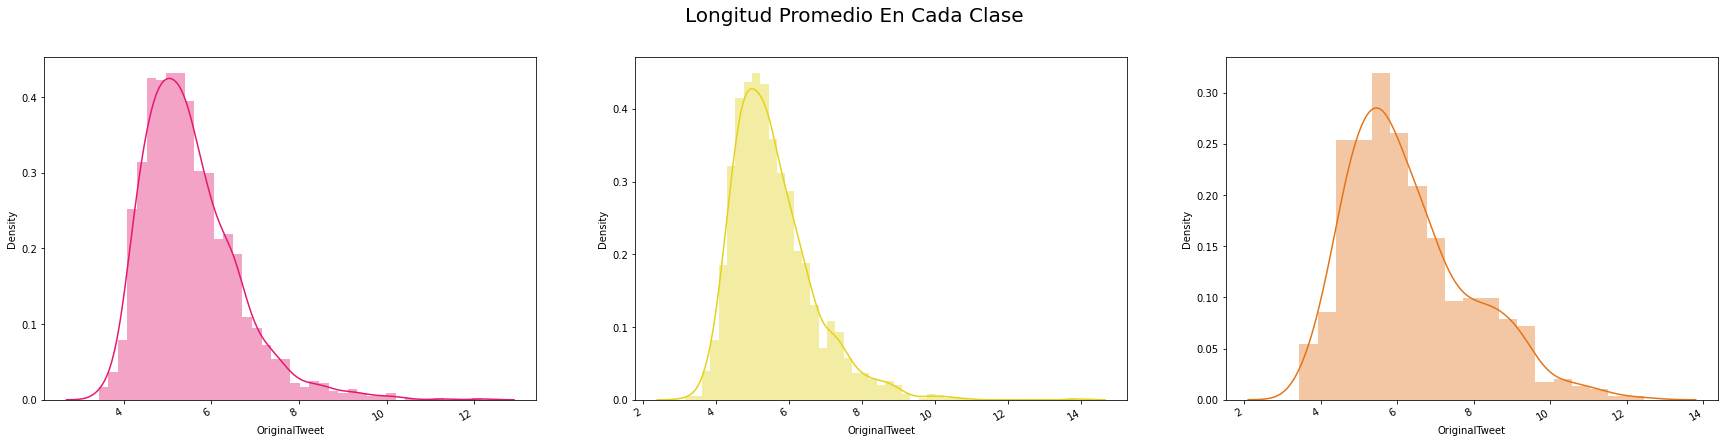

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,7))
fig.autofmt_xdate()
fig.suptitle('Longitud Promedio En Cada Clase', fontsize=20)
avg_word_length(dtest, "Extremely Negative", axes[0], '#e31970')
avg_word_length(dtest, "Positive", axes[1], '#e3d219')
avg_word_length(dtest, "Neutral", axes[2], '#e37419')
plt.show()

Procedemos a etiquetar los sentimientos

In [78]:
label = {
    'Extremely Negative':0, 
    'Neutral':1,
    'Positive':2
}
dtrain['SentimentLabel'] = dtrain['Sentiment'].map(lambda x:label[x])
dtest['SentimentLabel'] = dtest['Sentiment'].map(lambda x:label[x])

In [79]:
n_classes = dtrain["SentimentLabel"].nunique()
n_classes

3

Procedemos a la limpieza de nuestros datos

In [23]:

#Quita emojis
def strip_emoji(text):
    return emoji.replace_emoji(text, replace='')

#Quita signos y espacios
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower()
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    text = re.sub(r'[^\x00-\x7f]',r'', text)
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#Quita hashtag
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet))
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) 
    return new_tweet2

#Quita caracteres especiales $ y &
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

#Quita espacios multiples
def remove_mult_spaces(text): 
    return re.sub("\s\s+" , " ", text)

In [24]:
texts_new = []
for t in dtrain.OriginalTweet:
    texts_new.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(t))))))
texts_new_test = []
for t in dtest.OriginalTweet:
    texts_new_test.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(t))))))

In [25]:
dtrain['text_clean'] = texts_new
dtest['text_clean'] = texts_new_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
dtrain.head()

,OriginalTweet,Sentiment,SentimentLabel,text_clean
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,1,and and
1,advice Talk to your neighbours family to excha...,Positive,2,advice talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,2,coronavirus australia woolworths to give elder...
3,My food stock is not the only one which is emp...,Positive,2,my food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0,me ready to go at supermarket during the covid...


Observaremos la longitud de nuestros tweets tras la limpieza

In [27]:
text_len = []
for text in dtrain.text_clean:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

text_len_test = []
for text in dtest.text_clean:
    tweet_len = len(text.split())
    text_len_test.append(tweet_len)

dtrain['text_len'] = text_len
dtest['text_len'] = text_len_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


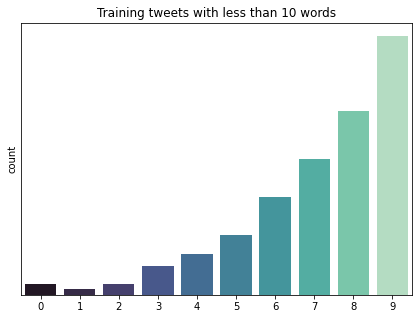

In [28]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=dtrain[dtrain['text_len']<10], palette='mako')
plt.title('Training tweets with less than 10 words')
plt.yticks([])
plt.ylabel('count')
plt.xlabel('')
plt.show()

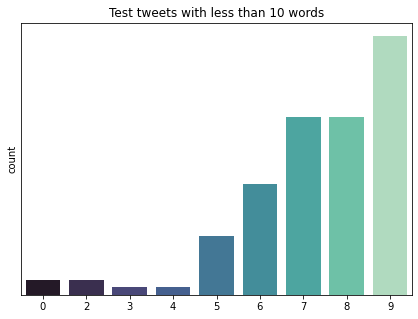

In [29]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=dtest[dtest['text_len']<10], palette='mako')
plt.title('Test tweets with less than 10 words')
plt.yticks([])
#ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

Notamaos que hay algunos que podemos considerar insignificantes y que no contribuyen a nuestro analisis, procederemos a removerlos

In [30]:
#Elimina aquellos con longitud menor a 5
dtrain = dtrain[dtrain['text_len'] > 4]
dtest = dtest[dtest['text_len'] > 4]

Asignamos nuestros datos para el modelo

In [31]:

X = dtrain['text_clean'].values
y = dtest['SentimentLabel'].values


In [32]:
y = dtrain['SentimentLabel']
y_test = dtest['SentimentLabel']



In [33]:
X = dtrain['text_clean'].to_numpy()
X_test = dtest['text_clean'].to_numpy()

In [34]:
#Procedemos a vectorizar los datos, indicamos tokens, longitud y output

text_vectorizer = layers.TextVectorization(max_tokens=20000, 
                                   output_mode="int", 
                                    output_sequence_length=600)

In [35]:
#Vectorizamos los datos de test
text_vectorizer.adapt(X)

In [36]:
X=text_vectorizer(X)
X_test=text_vectorizer(X_test)

In [37]:
words = text_vectorizer.get_vocabulary()

In [38]:
len(words)

20000

In [50]:
##Puesto que tenemos una clasificación de 3 categorías, vamos a usar OneHot encoding para nuestros datos.

sentiments_train = pd.get_dummies(dtrain["SentimentLabel"]) 
sentiments_test = pd.get_dummies(dtest["SentimentLabel"])


In [51]:
print('Sentimientos train', sentiments_train.shape)
print('Sentimientos test:', sentiments_test.shape)

Sentimientos train (40935, 3)
Sentimientos test: (3792, 3)


In [43]:
#Asignamos las variables apra nuestro modelo
y=sentiments_train
y_test=sentiments_test

Introducimos el codigo para el Transformer

In [40]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
             layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()

    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]
        attention_output = self.attention(
            inputs, inputs, attention_mask=mask)
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config

Construimos el modelo

In [44]:
vocab_size = 20000
embed_dim = 32
num_heads = 2
dense_dim = 32

inputs = keras.Input(shape=(None,), dtype="int64")
x = layers.Embedding(vocab_size, embed_dim)(inputs)
x = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 32)          640000    
                                                                 
 transformer_encoder_1 (Tran  (None, None, 32)         10656     
 sformerEncoder)                                                 
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 99  

Ejecutamos y evaluamos el modelo

In [45]:
callbacks = [
    keras.callbacks.ModelCheckpoint("transformer_encoder.keras",
                                    save_best_only=True)
]
history=model.fit(X,y, validation_data=(X_test,y_test), epochs=10, callbacks=callbacks)
model = keras.models.load_model(
    "transformer_encoder.keras",
    custom_objects={"TransformerEncoder": TransformerEncoder})
print(f"Test acc: {model.evaluate(X_test,y_test)[1]:.3f}")

Epoch 1/10
1280/1280 [==============================] - 34s 21ms/step - loss: 0.5094 - accuracy: 0.6213 - val_loss: 0.3966 - val_accuracy: 0.7482
Epoch 2/10
1280/1280 [==============================] - 27s 21ms/step - loss: 0.3765 - accuracy: 0.7804 - val_loss: 0.3331 - val_accuracy: 0.8072
Epoch 3/10
1280/1280 [==============================] - 29s 22ms/step - loss: 0.3227 - accuracy: 0.8234 - val_loss: 0.3062 - val_accuracy: 0.8259
Epoch 4/10
1280/1280 [==============================] - 28s 22ms/step - loss: 0.2880 - accuracy: 0.8445 - val_loss: 0.2925 - val_accuracy: 0.8302
Epoch 5/10
1280/1280 [==============================] - 26s 20ms/step - loss: 0.2646 - accuracy: 0.8587 - val_loss: 0.2834 - val_accuracy: 0.8320
Epoch 6/10
1280/1280 [==============================] - 26s 21ms/step - loss: 0.2443 - accuracy: 0.8705 - val_loss: 0.2958 - val_accuracy: 0.8257
Epoch 7/10
1280/1280 [==============================] - 26s 20ms/step - loss: 0.2296 - accuracy: 0.8784 - val_loss: 0.2806 -

Introducimos el codigo para el Positional Embedding

In [46]:
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=input_dim, output_dim=output_dim)
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=output_dim)
        self.sequence_length = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)

    def get_config(self):
        config = super().get_config()
        config.update({
            "output_dim": self.output_dim,
            "sequence_length": self.sequence_length,
            "input_dim": self.input_dim,
        })
        return config

Creamos el modelo con el Positional Embedding

In [47]:
vocab_size = 20000
sequence_length = 600
embed_dim = 32
num_heads = 2
dense_dim = 32

inputs = keras.Input(shape=(None,), dtype="int64")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(inputs)
x = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None)]            0         
                                                                 
 positional_embedding (Posit  (None, None, 32)         659200    
 ionalEmbedding)                                                 
                                                                 
 transformer_encoder_2 (Tran  (None, None, 32)         10656     
 sformerEncoder)                                                 
                                                                 
 global_max_pooling1d_2 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                           

Ejecutamos el modelo y evaluamos

In [48]:

callbacks = [
    keras.callbacks.ModelCheckpoint("full_transformer_encoder.keras",
                                    save_best_only=True)
]
history2=model.fit(X, y,validation_data=(X_test,y_test), epochs=10, callbacks=callbacks)
model2 = keras.models.load_model(
    "full_transformer_encoder.keras",
    custom_objects={"TransformerEncoder": TransformerEncoder,
                    "PositionalEmbedding": PositionalEmbedding})
print(f"Test acc: {model2.evaluate(X_test,y_test)[1]:.3f}")

Epoch 1/10
1280/1280 [==============================] - 30s 22ms/step - loss: 0.4817 - accuracy: 0.6463 - val_loss: 0.3458 - val_accuracy: 0.7882
Epoch 2/10
1280/1280 [==============================] - 28s 22ms/step - loss: 0.2857 - accuracy: 0.8444 - val_loss: 0.2872 - val_accuracy: 0.8304
Epoch 3/10
1280/1280 [==============================] - 28s 22ms/step - loss: 0.2335 - accuracy: 0.8782 - val_loss: 0.2725 - val_accuracy: 0.8397
Epoch 4/10
1280/1280 [==============================] - 28s 22ms/step - loss: 0.2076 - accuracy: 0.8923 - val_loss: 0.2831 - val_accuracy: 0.8436
Epoch 5/10
1280/1280 [==============================] - 28s 22ms/step - loss: 0.1895 - accuracy: 0.9025 - val_loss: 0.2719 - val_accuracy: 0.8552
Epoch 6/10
1280/1280 [==============================] - 28s 22ms/step - loss: 0.1780 - accuracy: 0.9084 - val_loss: 0.2760 - val_accuracy: 0.8410
Epoch 7/10
1280/1280 [==============================] - 28s 22ms/step - loss: 0.1683 - accuracy: 0.9130 - val_loss: 0.2870 -

Definimos una función para gráficar el comportamiento de nuestros modelos

In [80]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

(0.0, 0.5251434624195099)

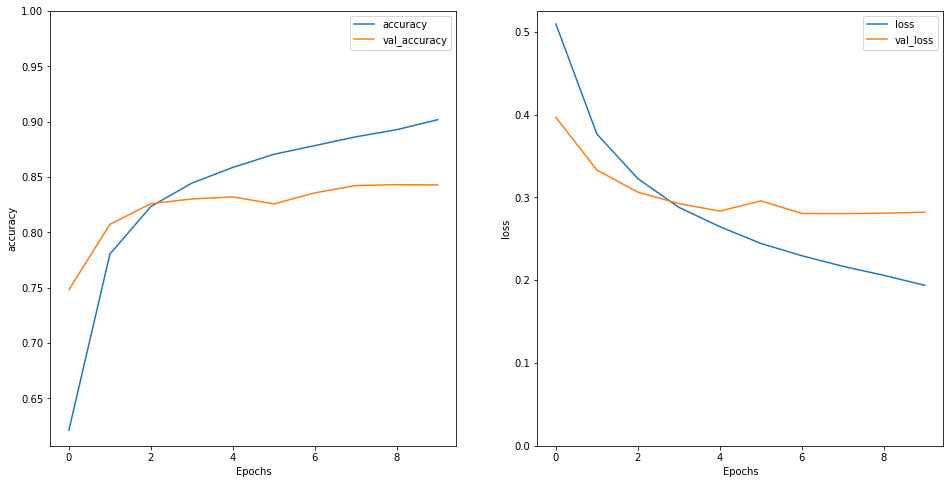

In [81]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

(0.0, 0.4982675097882748)

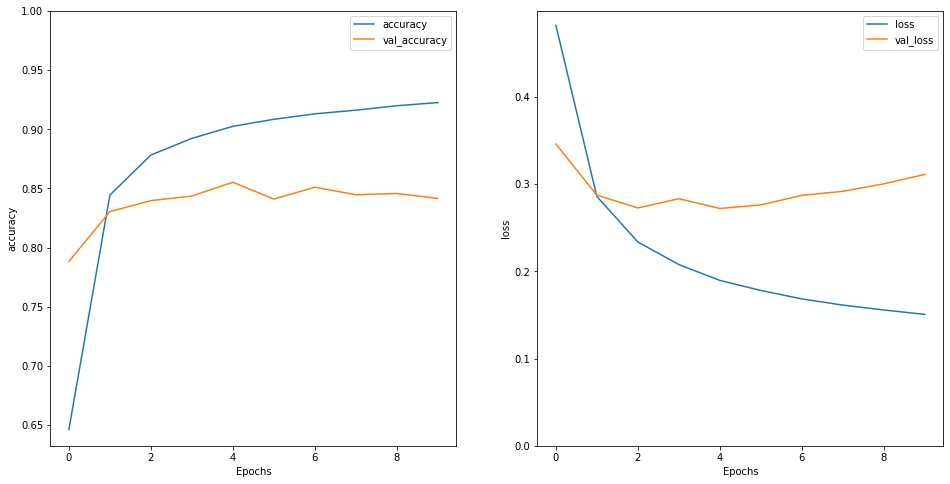

In [82]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history2, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history2, 'loss')
plt.ylim(0, None)